In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.optimize import minimize

## Dataset

In [46]:
D = np.genfromtxt("parts.csv")

In [47]:
d={}
d['x']=D[:,2]
d['y']=D[:,3]

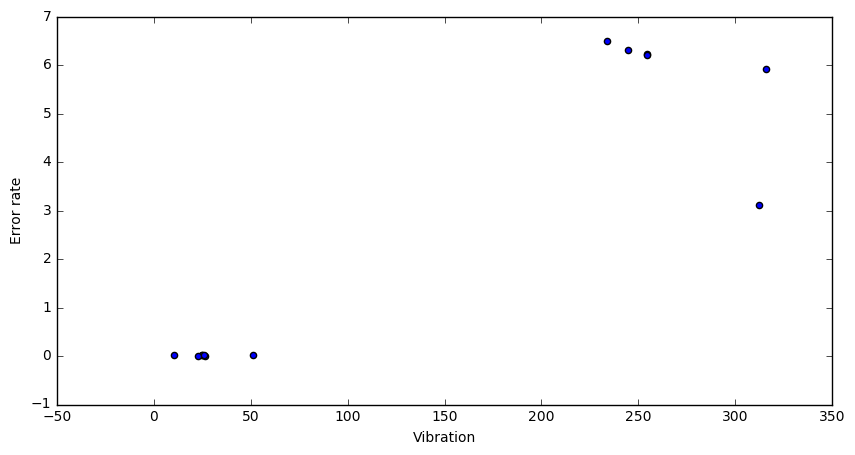

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
plt.xlabel("Vibration")
plt.ylabel("Error rate")
# plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-ve.png",transparent=True, bbox_inches="tight")

## Model

In [49]:
def f(x,w): return w[0] + x*w[1]

In [50]:
def dist(a,b): return (a-b)**2

In [51]:
def loss(w,d):
    loss = 0
    for i in range(len(d['x'])):
        x = d['x'][i]
        y = d['y'][i]
        loss += dist(f(x,w),y)
    return loss

In [52]:
loss([-3,2],d)

1731376.4499000004

## Minimize the Loss using Numerical Optimization

In [53]:
def F(w): return loss(w,d)
M=minimize(F,[0,0])

In [54]:
w_hat=M.x
print(w_hat)
print(F(w_hat))

[-0.37246787  0.02181439]
19.1402444252


## Visualize Loss Function

In [55]:
xlim = (-5,5,200)
ylim = (-0.05,0.05,200)
X = np.linspace(*xlim)
Y = np.linspace(*ylim)
Z = np.array([[ F([x,y]) for x in X] for y in Y ])

def rescale(Z):
    z_min = np.percentile(Z,0)
    z_max = np.percentile(Z,80)
    z_range = z_max - z_min
    Z_scaled = (Z-z_min)/z_range
    Z_scaled[Z_scaled > 1] = 1
    return Z_scaled

Z_scaled = rescale(Z)

# left right bottom top
extent = (xlim[0],xlim[1],ylim[1],ylim[0])
x_range = xlim[1]-xlim[0]
y_range = ylim[1]-ylim[0]
aspect = x_range/y_range/2
print(extent)

(-5, 5, 0.05, -0.05)


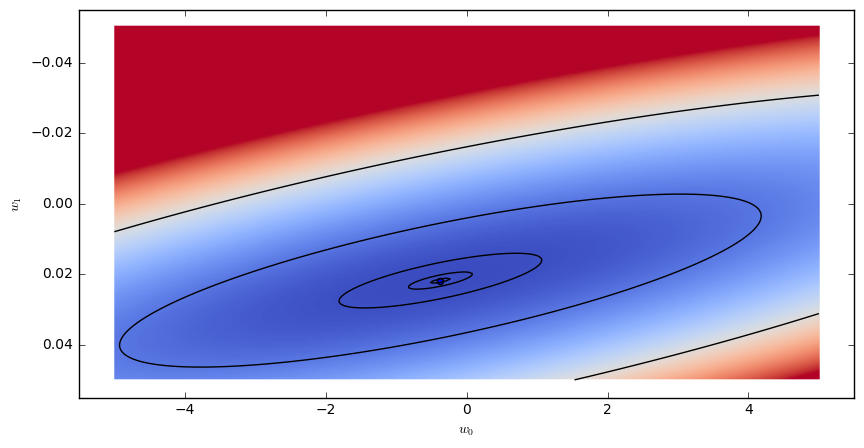

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(Z,cmap=cm.coolwarm,vmin=np.min(Z),vmax=np.percentile(Z,80), extent=extent, aspect=aspect)
plt.contour(X,Y,Z_scaled,[0.0001, 0.001, 0.01, 0.1, 0.5],colors="black")
plt.scatter(*w_hat)
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-lreg.png",transparent=True, bbox_inches="tight")

## Optimal Model

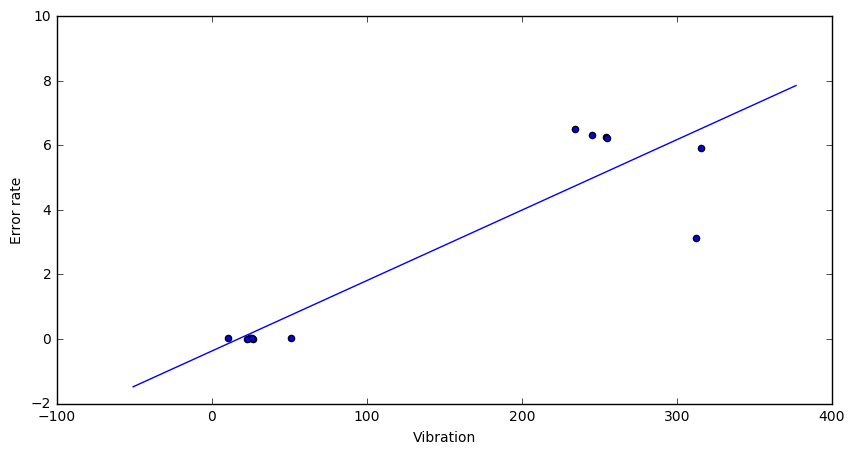

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
r = np.max(d['x']) - np.min(d['x'])
X = np.linspace(np.min(d['x'])-0.2*r,np.max(d['x'])+0.2*r,100)
Y = [f(x,w_hat) for x in X]
plt.plot(X,Y)
plt.xlabel("Vibration")
plt.ylabel("Error rate")
plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-lreg-model.png",transparent=True, bbox_inches="tight")

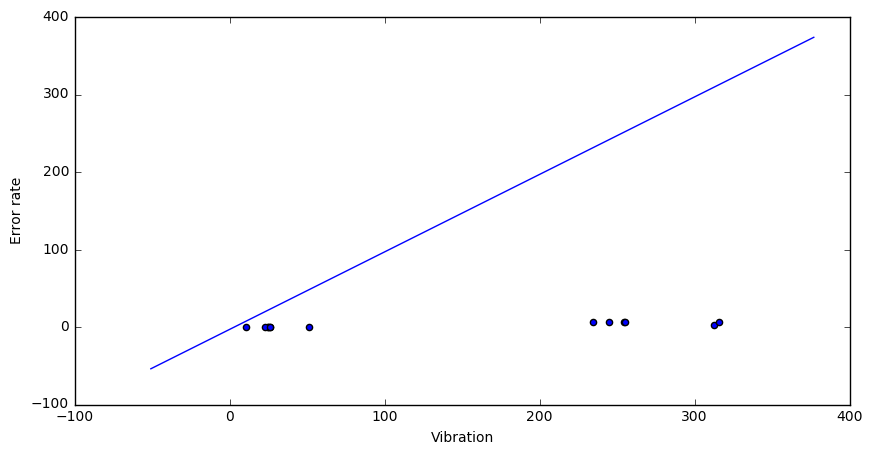

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(d['x'],d['y'])
r = np.max(d['x']) - np.min(d['x'])
X = np.linspace(np.min(d['x'])-0.2*r,np.max(d['x'])+0.2*r,100)
Y = [f(x,[-3,1]) for x in X]
plt.plot(X,Y)
plt.xlabel("Vibration")
plt.ylabel("Error rate")
plt.savefig("/Users/hartmann/p-workbench/HeinrichHartmann.github.io/assets/loss-lreg-example.png",transparent=True, bbox_inches="tight")